In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

import numpy.random as nr
import matplotlib.pyplot as plt

import scipy.stats as ss
import math


%matplotlib inline


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
train_data= pd.read_csv('train.csv') #, parse_dates=['Date_Customer'])
test_data= pd.read_csv('test.csv')#,parse_dates=['Date_Customer'])
train_data.head(5)

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_othe

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20453 entries, 0 to 20452
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(4), object(2)
memory usage: 124.8+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8774 entries, 0 to 8773
Columns: 799 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(3), object(2)
memory usage: 53.5+ MB


In [6]:
test_data.head()

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_other_raw_var_1

In [7]:
train_data.dtypes

row_id                                 int64
scout_id                               int64
rating_num                           float64
winner                                object
team                                  object
competitionId                          int64
player_position_1                    float64
player_position_2                    float64
player_height                        float64
player_weight                        float64
player_general_var_0                 float64
player_general_var_1                   int64
player_general_var_2                 float64
player_general_var_3                 float64
player_general_var_4                 float64
player_general_var_5                 float64
player_positional_raw_var_0          float64
player_positional_raw_var_1          float64
player_positional_raw_var_2          float64
player_positional_raw_var_3          float64
player_defensive_raw_var_4           float64
player_defensive_raw_var_5           float64
player_oth

### Remove Duplicates if present

In [8]:
train_data.drop_duplicates(subset='row_id', keep = 'first', inplace = True)

In [9]:
train_data.loc[train_data.duplicated(), :]

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_othe

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 0 to 20452
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(4), object(2)
memory usage: 125.0+ MB


In [11]:
test_data.drop_duplicates(subset='row_id', keep = 'first', inplace = True)

In [12]:
test_data.loc[train_data.duplicated(), :]

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_other_raw_var_1

In [13]:
test_data.head()

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_other_raw_var_1

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8774 entries, 0 to 8773
Columns: 799 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(3), object(2)
memory usage: 53.6+ MB


No Duplicate is present in both train and test datasets

In [15]:
train_data['winner'].unique()

array(['winner', 'loser', 'draw'], dtype=object)

In [16]:
train_data['team'].unique()

array(['team1', 'team2'], dtype=object)

In [17]:
train_data['rating_num'].value_counts()

6.0     3654
6.5     3247
7.5     3206
10.0    2442
5.0     2244
7.0     1248
3.5     1077
8.5     1062
9.0     1023
8.0      873
0.0      218
3.0      110
2.0       49
Name: rating_num, dtype: int64

In [18]:
player_r2 = len(train_data[train_data["rating_num"] == 2.0])
player_r3 = len(train_data[train_data["rating_num"] == 3.0])
player_r0 = len(train_data[train_data["rating_num"] == 0.0])
player_r8 = len(train_data[train_data["rating_num"] == 8.0])
player_r9 = len(train_data[train_data["rating_num"] == 9.0])
player_r8_5 = len(train_data[train_data["rating_num"] == 8.5])
player_r3_5 = len(train_data[train_data["rating_num"] == 3.5])
player_r7 = len(train_data[train_data["rating_num"] == 7.0])
player_r5 = len(train_data[train_data["rating_num"] == 5.0])
player_r10 = len(train_data[train_data["rating_num"] == 10.0])
player_r7_5 = len(train_data[train_data["rating_num"] == 7.5])
player_r6_5 = len(train_data[train_data["rating_num"] == 6.5])
player_r6 = len(train_data[train_data["rating_num"] == 6.0])
total_rating_num = player_r2 + player_r3 + player_r0 + player_r8 + player_r9 + player_r8_5 + player_r3_5 + player_r7 + player_r5 + player_r10 + player_r7_5 + player_r6_5 + player_r6
print(f'The number of players with rating 2 is {player_r2}')
print(f'The number of players with rating 3 is {player_r3}')
print(f'The number of players with rating 0 is {player_r0}')
print(f'The number of players with rating 8 is {player_r8}')
print(f'The number of players with rating 9 is {player_r9}')
print(f'The number of players with rating 8.5 is {player_r8_5}')
print(f'The number of players with rating 3.5 is {player_r3_5}')
print(f'The number of players with rating 7 is {player_r7}')
print(f'The number of players with rating 5 is {player_r5}')
print(f'The number of players with rating 10 is {player_r10}')
print(f'The number of players with rating 7.5 is {player_r7_5}')
print(f'The number of players with rating 6.5 is {player_r6_5}')
print(f'The number of players with rating 6 is {player_r6}')
print(f'The number of players with ratings is {total_rating_num }')


The number of players with rating 2 is 49
The number of players with rating 3 is 110
The number of players with rating 0 is 218
The number of players with rating 8 is 873
The number of players with rating 9 is 1023
The number of players with rating 8.5 is 1062
The number of players with rating 3.5 is 1077
The number of players with rating 7 is 1248
The number of players with rating 5 is 2244
The number of players with rating 10 is 2442
The number of players with rating 7.5 is 3206
The number of players with rating 6.5 is 3247
The number of players with rating 6 is 3654
The number of players with ratings is 20453


The  players with rating number 6 has the highest population of players of  3654  whilw the least is rating number 2 having 49 

In [19]:
#calculating percentage
p_r2= ( player_r2/ total_rating_num) * 100
p_r3= ( player_r3/ total_rating_num) * 100
p_r0= ( player_r0/ total_rating_num) * 100
p_r8= ( player_r8/ total_rating_num) * 100
p_r9= ( player_r9/ total_rating_num) * 100
p_r8_5= ( player_r8_5/ total_rating_num) * 100
p_r3_5= ( player_r3_5/ total_rating_num) * 100
p_r7= ( player_r7/ total_rating_num) * 100
p_r5= ( player_r5/ total_rating_num) * 100
p_r10= ( player_r10/ total_rating_num) * 100
p_r7_5= ( player_r7_5/ total_rating_num) * 100
p_r6_5= ( player_r6_5/ total_rating_num) * 100
p_r6= ( player_r6/ total_rating_num) * 100

print('The percentage of players with rating number 2 is {}'.format(p_r2))
print('The percentage of players with rating number 3  is {}'.format(p_r3))
print('The percentage of players with rating number 0  is {}'.format(p_r0))
print('The percentage of players with rating number 8  is {}'.format(p_r8))
print('The percentage of players with rating number 9 is {}'.format(p_r9))
print('The percentage of players with rating number 8.5  is {}'.format(p_r8_5))
print('The percentage of players with rating number 3.5  is {}'.format(p_r3_5))
print('The percentage of players with rating number 7  is {}'.format(p_r7))
print('The percentage of players with rating number 5  is {}'.format(p_r5))
print('The percentage of players with rating number 10  is {}'.format(p_r10))
print('The percentage of players with rating number 7.5 is {}'.format(p_r7_5))
print('The percentage of players with rating number 6.5  is {}'.format(p_r6_5))
print('The percentage of players with rating number 6  is {}'.format(p_r6))


The percentage of players with rating number 2 is 0.2395736566762822
The percentage of players with rating number 3  is 0.537818412946756
The percentage of players with rating number 0  is 1.06585830929448
The percentage of players with rating number 8  is 4.268322495477436
The percentage of players with rating number 9 is 5.0017112404048305
The percentage of players with rating number 8.5  is 5.192392314085953
The percentage of players with rating number 3.5  is 5.265731188578693
The percentage of players with rating number 7  is 6.101794357795922
The percentage of players with rating number 5  is 10.971495624113823
The percentage of players with rating number 10  is 11.939568767417983
The percentage of players with rating number 7.5 is 15.674962108248177
The percentage of players with rating number 6.5  is 15.875421698528333
The percentage of players with rating number 6  is 17.86534982643133


In [20]:
import scipy.stats as stats
# Calculating mean and Stdev of AGW
train_data_mean = np.mean(train_data["rating_num"])
train_data_std = np.std(train_data["rating_num"])
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(train_data["rating_num"].sort_values(), train_data_mean, train_data_std)

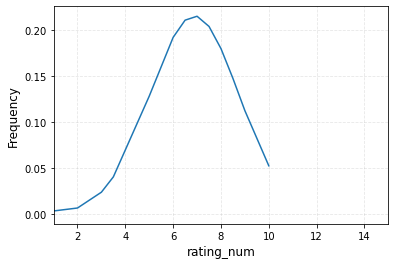

In [21]:
# Drawing a graph
plt.plot(train_data["rating_num"].sort_values(), pdf)
plt.xlim([1,15])  
plt.xlabel("rating_num", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()


<AxesSubplot:xlabel='rating_num', ylabel='Density'>

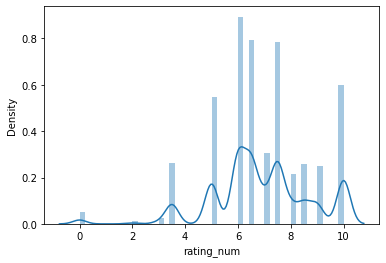

In [22]:
sns.distplot(train_data["rating_num"])

The highest 'Rating Number' i.e rating_num is 6 with 17.86534982643133 percentage

In [23]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


In [24]:
quality_report(train_data)

,Total NaN,Percent of NaN,Nunique,Dtype
team2_other_raw_var_19,20453,100.000000,0,float64
team1_other_raw_var_50,20453,100.000000,0,float64
team1_other_raw_var_72,20453,100.000000,0,float64
team1_other_raw_var_19,20453,100.000000,0,float64
team1_other_raw_var_31,20453,100.000000,0,float64
team1_other_raw_var_33,20453,100.000000,0,float64
team1_other_raw_var_92,20453,100.000000,0,float64
team1_other_raw_var_82,20453,100.000000,0,float64
team2_other_raw_var_72,20453,100.000000,0,float64
team1_other_raw_var_38,20453,100.000000,0,float64


Looks like all variables present are numbers, whereas "winner" and "team" are strings (possibly categories). some of the columns contain some missing values, which doesn't saves us a fair bit of work!


Here are some statistics for the numerical columns:

In [25]:
train_data.describe()

,row_id,scout_id,rating_num,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_other_raw_var_14

The ranges of values in the numerical columns seem too reasonable, so we may have to do little or no much data cleaning or correction. The "rating_num" column seems to be significantly skewed however, as the median (50 percentile, which is also known as 2nd quartile) is much lower than the maximum value.

Lets visualize those columns with missing values 

<AxesSubplot:>

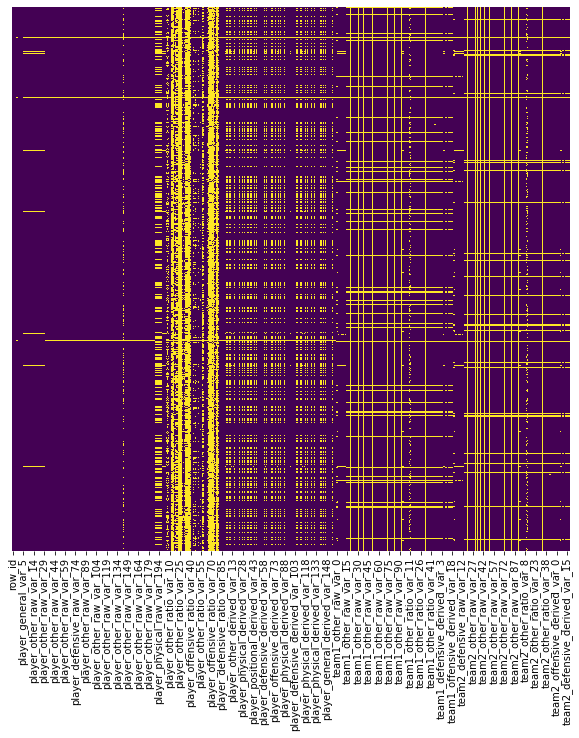

In [26]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)


Lets check out the test_data out as well

In [27]:
# quality_report(test_data)

<AxesSubplot:>

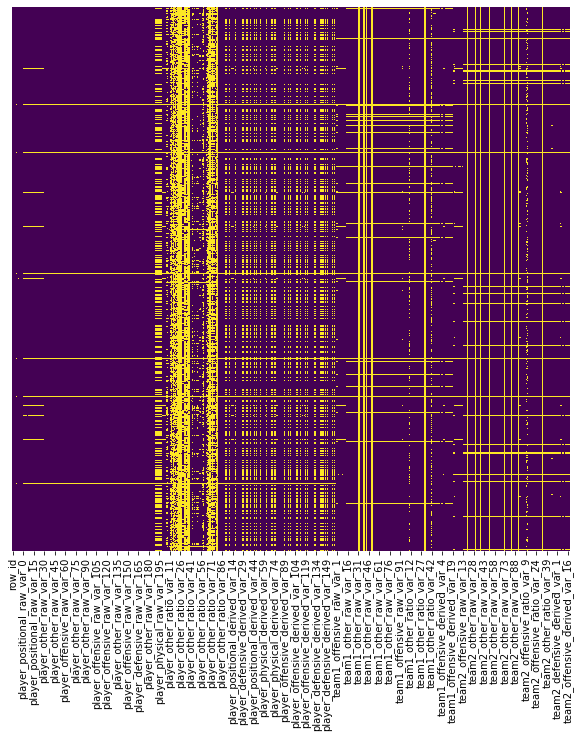

In [28]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)


## Dropping Columns according to NaN percentage in both train and test data

In [29]:
# train_data = train_data.loc[:, train_data.isnull().mean() < .2]

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 0 to 20452
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(4), object(2)
memory usage: 125.5+ MB


In [31]:
train_data['team'].unique()

array(['team1', 'team2'], dtype=object)

In [32]:
# train_data.loc[train_data['team'] == 'team1', 'team'] = 1.0
# train_data.loc[train_data['team'] == 'team2', 'team'] = 2.0

In [33]:
# test_data['team'].unique()

In [34]:
# test_data.loc[test_data['team'] == 'team1', 'team'] = 1.0
# test_data.loc[test_data['team'] == 'team2', 'team'] = 2.0

In [35]:
# test_data['team']=test_data.team.fillna(test_data.team.median())

In [36]:
# train_data['team']=train_data.team.fillna(test_data.team.median())

In [37]:
# test_data['team'].unique()

In [38]:
# train_data['team'].unique()

In [39]:
# test_data['winner'].unique()

In [40]:
# train_data['winner'].unique()

In [41]:
# test_data['player_weight'].unique()

In [42]:
# test_data['player_weight']=test_data.player_weight.fillna(test_data.player_weight.median())

In [43]:
# test_data['player_weight'].isnull()

In [44]:
# train_data['player_weight'].unique()

In [45]:
# train_data['player_weight']=train_data.player_weight.fillna(train_data.player_weight.median())

In [46]:
# train_data['player_height'].unique()

In [47]:
# train_data['player_height']=train_data.player_height.fillna(train_data.player_height.median())

In [48]:
# test_data['player_height'].unique()

In [49]:
# test_data['player_height']=test_data.player_height.fillna(test_data.player_height.median())

In [50]:
# test_data['player_position_1'].unique()

In [51]:
# test_data['player_position_1']=test_data.player_position_1.fillna(test_data.player_position_1.median())

In [52]:
# train_data['player_position_1'].unique()

In [53]:
# train_data['player_position_1']=train_data.player_position_1.fillna(test_data.player_position_1.median())

In [54]:
# train_data['player_position_2'].unique()

In [55]:
# train_data['player_position_2']=train_data.player_position_2.fillna(test_data.player_position_2.median())

In [56]:
# test_data['player_position_2'].unique()

In [57]:
# test_data['player_position_2']=test_data.player_position_2.fillna(test_data.player_position_2.median())

In [58]:
test_data['scout_id'].unique()

array([16,  2, 11, 15, 21,  1, 13,  3,  5,  4, 17, 12, 18, 10, 14, 26, 19,
       25, 20], dtype=int64)

In [59]:
train_data['scout_id'].unique()

array([13, 16,  4, 11, 15,  3,  2, 10, 19,  5, 14,  1, 12, 18, 26, 17, 21,
       20, 25, 22,  8], dtype=int64)

In [60]:
train_data['competitionId'].unique()

array([ 8,  5,  4,  7,  9, 10,  6, 11, 14, 15], dtype=int64)

In [61]:
test_data['competitionId'].unique()

array([ 7.,  9., 10., 11.,  5.,  6.,  4.,  8., 15., 14., nan])

In [62]:
test_data['competitionId']=test_data.competitionId.fillna(test_data.competitionId.median())

In [63]:
test_data['team2_system_id'].unique()

array([ 6.,  7., 10., 21.,  8., 12., 14.,  5., 22., 19., 18., 15., nan,
       17.,  9., 13., 27., 11., 20., 23., 28.,  4., 26.])

In [64]:
test_data['team2_system_id']=test_data.team2_system_id.fillna(test_data.team2_system_id.median())

In [65]:
train_data['team2_system_id'].unique()

array([10., 17.,  6.,  8., 18., 26., 12., 27., nan,  7., 14.,  9., 20.,
       21., 13.,  5.,  4., 19., 15., 11., 23., 22., 28.])

In [66]:
train_data['team2_system_id']=train_data.team2_system_id.fillna(train_data.team2_system_id.median())

In [67]:
train_data['team2_system_id'].unique()

array([10., 17.,  6.,  8., 18., 26., 12., 27.,  7., 14.,  9., 20., 21.,
       13.,  5.,  4., 19., 15., 11., 23., 22., 28.])

In [68]:
train_data['team1_system_id'].unique()

array([ 6.,  8., 12., nan, 10., 21., 11., 17., 26., 19., 14., 15.,  7.,
       18.,  9., 13., 20.,  4., 27., 22., 28.,  5., 23., 25.])

In [69]:
train_data['team1_system_id']=train_data.team1_system_id.fillna(train_data.team1_system_id.median())

In [70]:
test_data['team1_system_id'].unique()

array([ 6., 18., 10., 19.,  8., 21., 12., 26., nan,  9., 15.,  7., 17.,
       27., 14., 22., 11., 20., 13.,  4.,  5., 28., 23.])

In [71]:
test_data['team1_system_id']=test_data.team1_system_id.fillna(test_data.team1_system_id.median())

In [72]:
test_data['team1_system_id'].unique()

array([ 6., 18., 10., 19.,  8., 21., 12., 26.,  9., 15.,  7., 17., 27.,
       14., 22., 11., 20., 13.,  4.,  5., 28., 23.])

<AxesSubplot:>

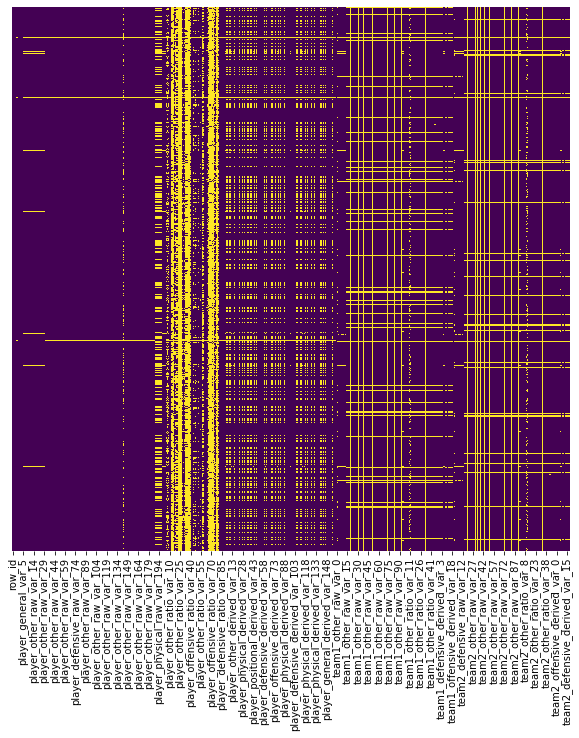

In [73]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)


In [74]:
# test_data = test_data.loc[:, test_data.isnull().mean() < .23]

In [75]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8774 entries, 0 to 8773
Columns: 799 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(3), object(2)
memory usage: 53.6+ MB


<AxesSubplot:>

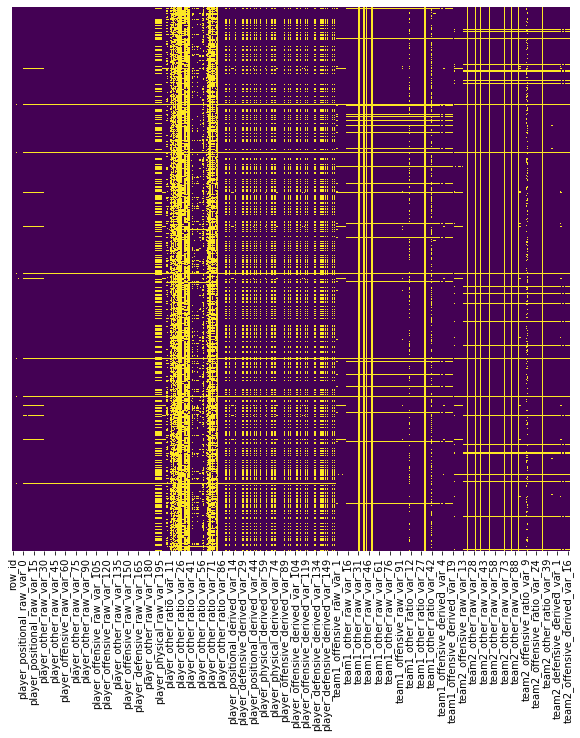

In [76]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)


In [77]:
# test_data = test_data.loc[:, test_data.isnull().mean() < .06]

<AxesSubplot:xlabel='winner', ylabel='player_weight'>

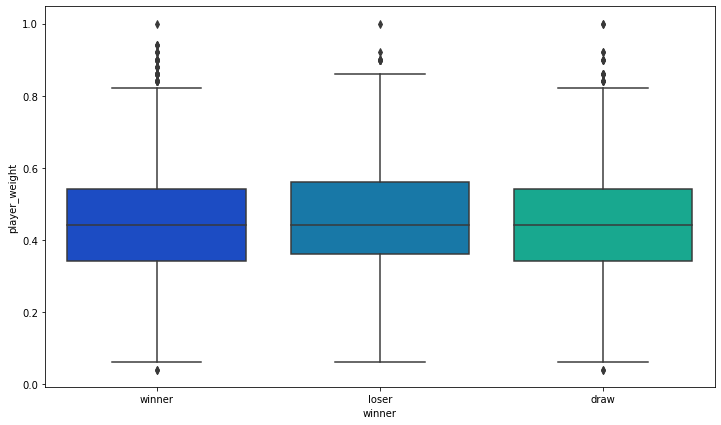

In [78]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='winner',y='player_weight',data=train_data, palette= 'winter')

Checking outliers in player weight

In [79]:
train_data.groupby(['winner'])['player_weight'].mean()

winner
draw      0.452588
loser     0.459826
winner    0.454001
Name: player_weight, dtype: float64

<AxesSubplot:xlabel='player_weight'>

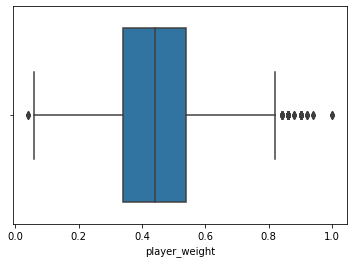

In [80]:
sns.boxplot(train_data['player_weight'])

In [81]:
# train_data.loc[train_data['player_weight'] > 0.9]

In [82]:
train_data.shape

(20453, 800)

In [83]:
test_data.shape

(8774, 799)

In [84]:
# train_data = train_data.dropna( axis =1)


In [85]:
# test_data= test_data.dropna( axis =1 )

In [86]:
train_data.shape

(20453, 800)

In [87]:
test_data.shape

(8774, 799)

In [88]:
# quality_report(train_data)

In [89]:
# quality_report(test_data)

In [90]:
# train_data = train_data.loc[:, train_data.isnull().mean() < .02]

In [91]:
# train_data.loc[trian_data['winner'] == 'winner', 'winner'] = 2.0
# train_data.loc[train_data['winner'] == 'draw', 'winner'] = 1.0
# train_data.loc[traindata['winner'] == 'loser', 'winner'] = 0.0

In [92]:
train_data.columns

Index(['row_id', 'scout_id', 'rating_num', 'winner', 'team', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight',
       ...
       'team2_defensive_derived_var_10', 'team2_offensive_derived_var_11',
       'team2_offensive_derived_var_12', 'team2_offensive_derived_var_13',
       'team2_offensive_derived_var_14', 'team2_defensive_derived_var_15',
       'team2_offensive_derived_var_16', 'team2_defensive_derived_var_17',
       'team2_offensive_derived_var_18', 'team2_offensive_derived_var_19'],
      dtype='object', length=800)

In [93]:
test_data.shape

(8774, 799)

In [94]:
test_data.columns

Index(['row_id', 'scout_id', 'winner', 'team', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight', 'player_general_var_0',
       ...
       'team2_defensive_derived_var_10', 'team2_offensive_derived_var_11',
       'team2_offensive_derived_var_12', 'team2_offensive_derived_var_13',
       'team2_offensive_derived_var_14', 'team2_defensive_derived_var_15',
       'team2_offensive_derived_var_16', 'team2_defensive_derived_var_17',
       'team2_offensive_derived_var_18', 'team2_offensive_derived_var_19'],
      dtype='object', length=799)

In [95]:
test_data['rating_num'] = 'test'

In [96]:
test_data.columns

Index(['row_id', 'scout_id', 'winner', 'team', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight', 'player_general_var_0',
       ...
       'team2_offensive_derived_var_11', 'team2_offensive_derived_var_12',
       'team2_offensive_derived_var_13', 'team2_offensive_derived_var_14',
       'team2_defensive_derived_var_15', 'team2_offensive_derived_var_16',
       'team2_defensive_derived_var_17', 'team2_offensive_derived_var_18',
       'team2_offensive_derived_var_19', 'rating_num'],
      dtype='object', length=800)

## Combining both test and train data 

In [97]:
data = pd.concat([train_data, test_data]).reset_index(drop = True)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29227 entries, 0 to 29226
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(3), object(3)
memory usage: 178.4+ MB


In [99]:
data.shape

(29227, 800)

In [100]:
# quality_report(data)

In [101]:
# data.drop(['team2_other_raw_var_19','team1_other_raw_var_50','team1_other_raw_var_72','team1_other_raw_var_19',
#     'team1_other_raw_var_31','team1_other_raw_var_33','team1_other_raw_var_92','team1_other_raw_var_82',
#     'team2_other_raw_var_72','team1_other_raw_var_38','team1_other_raw_var_40','team1_other_raw_var_43',
#     'team2_other_raw_var_92','team1_other_ratio_var_33','team1_other_ratio_var_32','team2_other_raw_var_82',
#     'team2_other_raw_var_51','team2_other_raw_var_50','team2_other_raw_var_31','team1_other_raw_var_51',
#     'team2_other_ratio_var_32','team2_other_raw_var_33','team2_other_ratio_var_33','team2_other_raw_var_38',
#     'team2_other_raw_var_40','team2_other_raw_var_43','player_other_ratio_var_26','player_other_ratio_var_27',
#     'player_other_ratio_var_24','player_other_ratio_var_28','player_other_ratio_var_25','player_other_ratio_var_23',
#     'player_positional_ratio_var_79','player_other_ratio_var_37','player_defensive_ratio_var_38','player_defensive_ratio_var_39',
#     'player_offensive_ratio_var_70','player_offensive_ratio_var_68','player_offensive_ratio_var_69','player_other_ratio_var_67',
#     'player_other_ratio_var_73','player_offensive_ratio_var_77','player_other_ratio_var_36','player_defensive_ratio_var_16',
#     'player_other_ratio_var_14','player_other_ratio_var_32','player_other_ratio_var_34','player_other_ratio_var_33',
#     'player_offensive_ratio_var_72','player_positional_ratio_var_22','player_offensive_ratio_var_78','player_offensive_ratio_var_13',
#     'player_other_ratio_var_66','player_offensive_ratio_var_40', 'player_other_ratio_var_7'
#     ,'player_offensive_derived_var_24','player_offensive_derived_var_25','player_other_derived_var_42','player_offensive_derived_var_55',
#     'player_offensive_derived_var_56','player_positional_derived_var_64','player_other_derived_var_76','player_offensive_derived_var_89','player_offensive_derived_var_90',
#     'player_positional_derived_var_100','player_other_derived_var_115','player_offensive_derived_var_128','player_positional_derived_var_136',
#     'player_other_raw_var_142','player_other_raw_var_184','player_offensive_derived_var_153','player_offensive_derived_var_151'], inplace =True, axis = 1)

In [102]:
# quality_report(data)

In [103]:
data.shape

(29227, 800)

In [104]:
# data = data.drop('rating_num', axis =1)

In [105]:
quality_report(data)

,Total NaN,Percent of NaN,Nunique,Dtype
team2_other_raw_var_19,29227,100.000000,0,float64
team2_other_raw_var_92,29227,100.000000,0,float64
team2_other_raw_var_31,29227,100.000000,0,float64
team1_other_ratio_var_32,29227,100.000000,0,float64
team1_other_ratio_var_33,29227,100.000000,0,float64
team1_other_raw_var_72,29227,100.000000,0,float64
team2_other_raw_var_33,29227,100.000000,0,float64
team2_other_raw_var_38,29227,100.000000,0,float64
team2_other_ratio_var_33,29227,100.000000,0,float64
team2_other_ratio_var_32,29227,100.000000,0,float64


In [106]:
data = data.loc[:, data.isnull().mean() < .02]

In [107]:
data.shape

(29227, 314)

In [108]:
# quality_report(data)

### Dropping certain percentage of zeros values in each of the datframe colum

In [109]:
def drop_almost_zero(df, percentage):
    row_cut_off = int(percentage/100*len(df.columns))
    df = df[(df==0).sum(axis='columns') <= row_cut_off]

    column_cut_off = int(percentage/100*len(df)) 
    b = (df == 0).sum(axis='rows')
    df = df[ b[ b <= column_cut_off].index.values ]

    return df

In [110]:
data = drop_almost_zero(data, 50)

In [111]:
data.shape

(20686, 178)

In [112]:
data.shape

(20686, 178)

In [113]:
# quality_report(data)

In [114]:
# data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [115]:
# quality_report(data)

# Convert Categorical columns to numerical

In [116]:
data.loc[data['winner'] == 'winner', 'winner'] = 2.0
data.loc[data['winner'] == 'draw', 'winner'] = 1.0
data.loc[data['winner'] == 'loser', 'winner'] = 0.0

In [117]:
data['winner'] = data['winner'].astype('int')

In [118]:
# data.loc[data['team'] == 'team1', 'team'] = 1.0
# data.loc[data['team'] == 'team2', 'team'] = 2.0

In [119]:
# Using one hot encoder for team 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
enc_df = pd.DataFrame(encoder.fit_transform(data[['team']]).toarray())
data = data.join(enc_df)
# df_train = pd.drop(['team'], axis = 1)

In [120]:
data.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_4,player_other_raw_var_6,player_offensive_raw_var_31,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_38,player_other_raw_var_41,player_defensive_raw_var_42,player_other_raw_var_44,player_other_raw_var_45,player_other_raw_var_56,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_general_raw_var_78,player_other_raw_var_89,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_offensive_raw_var_126,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_136,player_defensive_raw_var_137,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_defensive_raw_var_166,player_other_raw_var_181,player_other_raw_var_183,player_other_raw_var_184,player_positional_raw_var_185,player_offensive_raw_var_186,player_other_raw_var_187,player_other_ratio_var_11,player_other_ratio_var_41,player_other_ratio_var_42,player_other_ratio_var_43,player_offensive_ratio_var_45,player_other_ratio_var_48,player_offensive_ratio_var_50,player_offensive_ratio_var_53,player_other_ratio_var_56,player_other_ratio_var_60,player_other_ratio_var_61,player_other_ratio_var_62,player_other_ratio_var_63,player_defensive_ratio_var_81,player_defensive_ratio_var_84,player_defensive_ratio_var_85,player_other_ratio_var_86,player_defensive_derived_var_0,player_defensive_derived_var_1,player_defensive_derived_var_7,player_defensive_derived_var_8,player_defensive_derived_var_11,player_other_derived_var_13,player_offensive_derived_var_17,player_defensive_derived_var_19,player_other_derived_var_20,player_offensive_derived_var_21,player_offensive_derived_var_24,player_offensive_derived_var_25,player_offensive_derived_var_26,player_defensive_derived_var_29,player_defensive_derived_var_31,player_defensive_derived_var_32,player_defensive_derived_var_33,player_defensive_derived_var_37,player_offensive_derived_var_38,player_offensive_derived_var_41,player_other_derived_var_42,player_defensive_derived_var_49,player_other_derived_var_51,player_offensive_derived_var_52,player_offensive_derived_var_55,player_offensive_derived_var_56,player_positional_derived_var_57,player_defensive_derived_var_58,player_positional_derived_var_64,player_defensive_derived_var_65,player_defensive_derived_var_66,player_offensive_derived_var_68,player_defensive_derived_var_72,player_offensive_derived_var_73,player_other_derived_var_76,player_defensive_derived_var_83,player_other_derived_var_84,player_positional_derived_var_85,player_offensive_derived_var_86,player_offensive_derived_var_89,player_offensive_derived_var_90,player_offensive_derived_var_91,player_positional_derived_var_92,player_defensive_derived_var_93,player_defensive_derived_var_95,player_defensive_derived_var_98,player_positional_derived_var_100,player_defensive_derived_var_101,player_defensive_derived_var_102,player_offensive_derived_var_104,player_defensive_derived_var_108,player_defensive_derived_var_109,player_offensive_derived_var_110,player_defensive_der

In [121]:
data.rename(columns = {0:'team1', 1: 'team2'}, inplace = True)

In [122]:
data[2].unique()

array([ 0.,  1., nan])

In [123]:
data.shape

(20686, 181)

In [124]:
data = data.drop(['team'], axis = 1)

In [125]:
data.head()

,row_id,scout_id,rating_num,winner,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_4,player_other_raw_var_6,player_offensive_raw_var_31,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_38,player_other_raw_var_41,player_defensive_raw_var_42,player_other_raw_var_44,player_other_raw_var_45,player_other_raw_var_56,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_general_raw_var_78,player_other_raw_var_89,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_offensive_raw_var_126,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_136,player_defensive_raw_var_137,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_defensive_raw_var_166,player_other_raw_var_181,player_other_raw_var_183,player_other_raw_var_184,player_positional_raw_var_185,player_offensive_raw_var_186,player_other_raw_var_187,player_other_ratio_var_11,player_other_ratio_var_41,player_other_ratio_var_42,player_other_ratio_var_43,player_offensive_ratio_var_45,player_other_ratio_var_48,player_offensive_ratio_var_50,player_offensive_ratio_var_53,player_other_ratio_var_56,player_other_ratio_var_60,player_other_ratio_var_61,player_other_ratio_var_62,player_other_ratio_var_63,player_defensive_ratio_var_81,player_defensive_ratio_var_84,player_defensive_ratio_var_85,player_other_ratio_var_86,player_defensive_derived_var_0,player_defensive_derived_var_1,player_defensive_derived_var_7,player_defensive_derived_var_8,player_defensive_derived_var_11,player_other_derived_var_13,player_offensive_derived_var_17,player_defensive_derived_var_19,player_other_derived_var_20,player_offensive_derived_var_21,player_offensive_derived_var_24,player_offensive_derived_var_25,player_offensive_derived_var_26,player_defensive_derived_var_29,player_defensive_derived_var_31,player_defensive_derived_var_32,player_defensive_derived_var_33,player_defensive_derived_var_37,player_offensive_derived_var_38,player_offensive_derived_var_41,player_other_derived_var_42,player_defensive_derived_var_49,player_other_derived_var_51,player_offensive_derived_var_52,player_offensive_derived_var_55,player_offensive_derived_var_56,player_positional_derived_var_57,player_defensive_derived_var_58,player_positional_derived_var_64,player_defensive_derived_var_65,player_defensive_derived_var_66,player_offensive_derived_var_68,player_defensive_derived_var_72,player_offensive_derived_var_73,player_other_derived_var_76,player_defensive_derived_var_83,player_other_derived_var_84,player_positional_derived_var_85,player_offensive_derived_var_86,player_offensive_derived_var_89,player_offensive_derived_var_90,player_offensive_derived_var_91,player_positional_derived_var_92,player_defensive_derived_var_93,player_defensive_derived_var_95,player_defensive_derived_var_98,player_positional_derived_var_100,player_defensive_derived_var_101,player_defensive_derived_var_102,player_offensive_derived_var_104,player_defensive_derived_var_108,player_defensive_derived_var_109,player_offensive_derived_var_110,player_defensive_derived_

In [126]:
data[2].unique()

array([ 0.,  1., nan])

In [127]:
data = data.drop([2], axis = 1)

In [128]:
data.shape

(20686, 179)

In [129]:
# new_data= data.drop('rating_num')

In [130]:
# feature = data.select_dtypes(include = 'number').columns # Selecting all numeric data

In [131]:
# feature

In [132]:
data['team1'].unique()

array([ 1.,  0., nan])

In [133]:
data['team1']=data.team1.fillna(data.team1.median())

In [134]:
data['team1'].unique()

array([1., 0.])

In [135]:
data['team1'].value_counts()

1.0    13303
0.0     7383
Name: team1, dtype: int64

In [136]:
data['team2'].unique()

array([ 0.,  1., nan])

In [137]:
data['team2']=data.team2.fillna(data.team2.median())

In [138]:
data['team2'].unique()

array([0., 1.])

In [139]:
data['team2'].value_counts()

0.0    13304
1.0     7382
Name: team2, dtype: int64

In [140]:
# data['team'].unique()

In [141]:
# data['team'].value_counts()

In [142]:
# data.groupby(['winner'])['team1'].mean()

In [143]:
# data.groupby(['winner'])['team2'].mean()

In [144]:
# data['team1']=data.team1.fillna(data.team1.median())

In [145]:
# def team1(cols):
#     team1 = cols[1]
#     winner= cols[0]
#     if pd.isnull(team1):
#         if winner== 0.0:
#             return 0.53
#         elif winner == 1.0:
#             return 0.51
#         else:
#             return 0.52
#     else:
#         return team1

In [146]:
# data['team1'] = data[['winner','team1']].apply(team1,axis=1)

In [147]:
# data['team1'].unique()

In [148]:
# data['team2'] = data.team2.fillna(data.team2.median())

In [149]:
# data['team2'].unique()

In [150]:
# data.shape

In [151]:
# def team2(cols):
#     team1 = cols[1]
#     winner= cols[0]
#     if pd.isnull(team2):
#         if winner== 0.0:
#             return 0.47
#         elif winner == 1.0:
#             return 0.49
#         else:
#             return 0.52
#     else:
#         return team2

## REMOVING OUTLIERS

In [152]:
# def remove_outliers(data):
#     for col in data:
#         high = data[col].mean() + 3*data[col].std()
#         low = data[col].mean() - 3*data[col].std()
#         data[col] = np.where(
#             data[col] > high,
#             high,
#             np.where(
#                 data[col] < low,
#                 low,
#                 data[col]))
        
# remove_outliers(data)

In [153]:
# data.shape

In [154]:
# quality_report(data)

In [155]:
data.groupby(['winner'])['player_weight'].mean()

winner
0    0.445460
1    0.434811
2    0.438209
Name: player_weight, dtype: float64

In [156]:
def player_weight(cols):
    player_weight = cols[1]
    winner= cols[0]
    if pd.isnull(player_weight):
        if winner== 0.0:
            return 0.46
        elif winner == 1.0:
            return 0.46
        else:
            return 0.45
    else:
        return player_weight

In [157]:
data['player_weight'] = data[['winner','player_weight']].apply(player_weight,axis=1)

In [158]:
data['player_weight'].unique()

array([0.48, 0.44, 0.7 , 0.46, 0.34, 0.22, 0.58, 0.38, 0.18, 0.42, 0.32,
       0.5 , 0.68, 0.3 , 0.54, 0.52, 0.26, 0.28, 0.82, 0.4 , 0.84, 0.64,
       0.56, 0.76, 0.62, 0.72, 0.24, 0.6 , 0.74, 0.2 , 0.78, 0.36, 0.12,
       0.66, 0.1 , 0.06, 0.9 , 0.14, 0.16, 0.04, 0.92, 0.8 , 0.94, 0.86,
       0.88, 0.96, 0.08, 0.45])

In [159]:
data.groupby(['winner'])['player_height'].mean()

winner
0    0.483219
1    0.470442
2    0.472909
Name: player_height, dtype: float64

In [160]:
def player_height(cols):
    player_height = cols[1]
    winner= cols[0]
    if pd.isnull(player_height):
        if winner== 0.0:
            return  0.497712
        elif winner == 1.0:
            return 0.487796
        else:
            return 0.491220
    else:
        return player_height

In [161]:
data['player_height'] = data[['winner','player_height']].apply(player_height,axis=1)

In [162]:
data['player_height'].unique()

array([0.31707317, 0.68292683, 0.73170732, 0.6097561 , 0.24390244,
       0.3902439 , 0.58536585, 0.29268293, 0.36585366, 0.34146341,
       0.70731707, 0.46341463, 0.65853659, 0.48780488, 0.41463415,
       0.14634146, 0.56097561, 0.82926829, 0.53658537, 0.43902439,
       0.51219512, 0.75609756, 0.17073171, 0.19512195, 0.63414634,
       0.26829268, 0.80487805, 0.2195122 , 0.7804878 , 0.02439024,
       0.07317073, 0.12195122, 0.85365854, 0.90243902, 0.09756098,
       0.487796  , 0.92682927, 0.95121951, 0.87804878, 0.497712  ,
       0.04878049, 0.        , 0.49122   ])

In [163]:
data.groupby(['winner'])['player_position_1'].mean()

winner
0    6.697059
1    6.898394
2    6.994746
Name: player_position_1, dtype: float64

In [164]:
def player_position_1(cols):
    player_position_1 = cols[1]
    winner= cols[0]
    if pd.isnull(player_position_1):
        if winner== 0.0:
            return 7.6
        elif winner == 1.0:
            return 7.8
        else:
            return 7.6
    else:
        return player_position_1

In [165]:
data['player_position_1'] = data[['winner','player_position_1']].apply(player_position_1,axis=1)

In [166]:
data['player_position_1'].unique()

array([ 7. , 11. , 10. ,  3. ,  8. ,  4. ,  5. , 15. ,  2. , 17. , 12. ,
       16. ,  1. ,  9. ,  6. , 19. , 13. ,  7.6, 14. , 18. ,  7.8])

In [167]:
data.groupby(['winner'])['player_position_2'].mean()

winner
0    7.157616
1    7.362346
2    7.450485
Name: player_position_2, dtype: float64

In [168]:
def player_position_2(cols):
    player_position_2 = cols[1]
    winner= cols[0]
    if pd.isnull(player_position_2):
        if winner== 0.0:
            return 8.0
        elif winner == 1.0:
            return 8.2
        else:
            return 8.0
    else:
        return player_position_2

In [169]:
data['player_position_2'] = data[['winner','player_position_2']].apply(player_position_2,axis=1)

In [170]:
data['player_position_2'].unique()

array([ 7. , 11. , 10. ,  9. ,  8. ,  3. ,  4. ,  5. , 15. ,  2. , 17. ,
       12. , 16. ,  1. ,  6. , 19. , 13. , 14. , 18. ,  8.2])

In [171]:
# data.groupby(['winner'])['team1_system_id'].mean()

In [172]:
# def team1_system_id(cols):
#     team1_system_id = cols[1]
#     winner= cols[0]
#     if pd.isnull(team1_system_id):
#         if winner== 0.0:
#             return 11
#         elif winner == 1.0:
#             return 11.2
#         else:
#             return 11.1
#     else:
#         return team1_system_id

In [173]:
# data['team1_system_id'] = data[['winner','team1_system_id']].apply(team1_system_id,axis=1)

In [174]:
# data.groupby(['winner'])['team2_system_id'].mean()

### Visualization of Distribution Plots and Data Preprocessing


In [175]:
# def numeric_distribution_plot(df):
#     """
#     Description : Gives distribution plot for all the numeric features
#     in the dataframe passed
    
#     Argument : Dataframe
#     """
#     for col in df.columns:
#         if df[col].dtype != 'object':
#             print(df[col].describe())
#             plt.figure(figsize=(12,5))
#             plt.title("Distribution of "+col)
#             ax = sns.distplot(df[col].dropna())
#             plt.tight_layout()
#             plt.show()

In [176]:
# numeric_distribution_plot(train_data)

### Distribution Plots for test data 

In [177]:
# numeric_distribution_plot(test_data)

Looking at the plots above we can use median for imputing missing value because the most of the graph are skewed and those without missing values such as row_id, scout_id are uniform distribution. Since Just few percentage has nan values then we can easily fill the nan values from visualization of our distribution plots 

In [178]:
# def team2_system_id(cols):
#     team2_system_id = cols[1]
#     winner= cols[0]
#     if pd.isnull(team2_system_id):
#         if winner== 0.0:
#             return 11.1
#         elif winner == 1.0:
#             return 11.1
#         else:
#             return 11.1
#     else:
#         return team2_system_id

In [179]:
# data['team2_system_id'] = data[['winner','team2_system_id']].apply(team2_system_id,axis=1)

In [180]:
# data.shape

In [181]:
# quality_report(data)

In [182]:
# data = data.loc[:, data.isnull().mean() < .01]

In [183]:
data.shape

(20686, 179)

In [184]:
data.head()

,row_id,scout_id,rating_num,winner,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_4,player_other_raw_var_6,player_offensive_raw_var_31,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_38,player_other_raw_var_41,player_defensive_raw_var_42,player_other_raw_var_44,player_other_raw_var_45,player_other_raw_var_56,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_general_raw_var_78,player_other_raw_var_89,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_offensive_raw_var_126,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_136,player_defensive_raw_var_137,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_defensive_raw_var_166,player_other_raw_var_181,player_other_raw_var_183,player_other_raw_var_184,player_positional_raw_var_185,player_offensive_raw_var_186,player_other_raw_var_187,player_other_ratio_var_11,player_other_ratio_var_41,player_other_ratio_var_42,player_other_ratio_var_43,player_offensive_ratio_var_45,player_other_ratio_var_48,player_offensive_ratio_var_50,player_offensive_ratio_var_53,player_other_ratio_var_56,player_other_ratio_var_60,player_other_ratio_var_61,player_other_ratio_var_62,player_other_ratio_var_63,player_defensive_ratio_var_81,player_defensive_ratio_var_84,player_defensive_ratio_var_85,player_other_ratio_var_86,player_defensive_derived_var_0,player_defensive_derived_var_1,player_defensive_derived_var_7,player_defensive_derived_var_8,player_defensive_derived_var_11,player_other_derived_var_13,player_offensive_derived_var_17,player_defensive_derived_var_19,player_other_derived_var_20,player_offensive_derived_var_21,player_offensive_derived_var_24,player_offensive_derived_var_25,player_offensive_derived_var_26,player_defensive_derived_var_29,player_defensive_derived_var_31,player_defensive_derived_var_32,player_defensive_derived_var_33,player_defensive_derived_var_37,player_offensive_derived_var_38,player_offensive_derived_var_41,player_other_derived_var_42,player_defensive_derived_var_49,player_other_derived_var_51,player_offensive_derived_var_52,player_offensive_derived_var_55,player_offensive_derived_var_56,player_positional_derived_var_57,player_defensive_derived_var_58,player_positional_derived_var_64,player_defensive_derived_var_65,player_defensive_derived_var_66,player_offensive_derived_var_68,player_defensive_derived_var_72,player_offensive_derived_var_73,player_other_derived_var_76,player_defensive_derived_var_83,player_other_derived_var_84,player_positional_derived_var_85,player_offensive_derived_var_86,player_offensive_derived_var_89,player_offensive_derived_var_90,player_offensive_derived_var_91,player_positional_derived_var_92,player_defensive_derived_var_93,player_defensive_derived_var_95,player_defensive_derived_var_98,player_positional_derived_var_100,player_defensive_derived_var_101,player_defensive_derived_var_102,player_offensive_derived_var_104,player_defensive_derived_var_108,player_defensive_derived_var_109,player_offensive_derived_var_110,player_defensive_derived_

In [185]:
# quality_report(data)

In [186]:
data.tail()

,row_id,scout_id,rating_num,winner,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_4,player_other_raw_var_6,player_offensive_raw_var_31,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_38,player_other_raw_var_41,player_defensive_raw_var_42,player_other_raw_var_44,player_other_raw_var_45,player_other_raw_var_56,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_general_raw_var_78,player_other_raw_var_89,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_offensive_raw_var_126,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_136,player_defensive_raw_var_137,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_defensive_raw_var_166,player_other_raw_var_181,player_other_raw_var_183,player_other_raw_var_184,player_positional_raw_var_185,player_offensive_raw_var_186,player_other_raw_var_187,player_other_ratio_var_11,player_other_ratio_var_41,player_other_ratio_var_42,player_other_ratio_var_43,player_offensive_ratio_var_45,player_other_ratio_var_48,player_offensive_ratio_var_50,player_offensive_ratio_var_53,player_other_ratio_var_56,player_other_ratio_var_60,player_other_ratio_var_61,player_other_ratio_var_62,player_other_ratio_var_63,player_defensive_ratio_var_81,player_defensive_ratio_var_84,player_defensive_ratio_var_85,player_other_ratio_var_86,player_defensive_derived_var_0,player_defensive_derived_var_1,player_defensive_derived_var_7,player_defensive_derived_var_8,player_defensive_derived_var_11,player_other_derived_var_13,player_offensive_derived_var_17,player_defensive_derived_var_19,player_other_derived_var_20,player_offensive_derived_var_21,player_offensive_derived_var_24,player_offensive_derived_var_25,player_offensive_derived_var_26,player_defensive_derived_var_29,player_defensive_derived_var_31,player_defensive_derived_var_32,player_defensive_derived_var_33,player_defensive_derived_var_37,player_offensive_derived_var_38,player_offensive_derived_var_41,player_other_derived_var_42,player_defensive_derived_var_49,player_other_derived_var_51,player_offensive_derived_var_52,player_offensive_derived_var_55,player_offensive_derived_var_56,player_positional_derived_var_57,player_defensive_derived_var_58,player_positional_derived_var_64,player_defensive_derived_var_65,player_defensive_derived_var_66,player_offensive_derived_var_68,player_defensive_derived_var_72,player_offensive_derived_var_73,player_other_derived_var_76,player_defensive_derived_var_83,player_other_derived_var_84,player_positional_derived_var_85,player_offensive_derived_var_86,player_offensive_derived_var_89,player_offensive_derived_var_90,player_offensive_derived_var_91,player_positional_derived_var_92,player_defensive_derived_var_93,player_defensive_derived_var_95,player_defensive_derived_var_98,player_positional_derived_var_100,player_defensive_derived_var_101,player_defensive_derived_var_102,player_offensive_derived_var_104,player_defensive_derived_var_108,player_defensive_derived_var_109,player_offensive_derived_var_110,player_defensive_derived_

In [187]:
data = data.dropna( )

In [188]:
data.shape

(20174, 179)

In [189]:
data['rating_num'].unique()

array([7.0, 8.5, 3.5, 7.5, 6.5, 8.0, 10.0, 6.0, 9.0, 2.0, 0.0, 5.0, 3.0,
       'test'], dtype=object)

In [190]:
# quality_report(data)

In [191]:
data['player_height'].unique()

array([0.31707317, 0.68292683, 0.73170732, 0.6097561 , 0.24390244,
       0.3902439 , 0.58536585, 0.29268293, 0.36585366, 0.34146341,
       0.70731707, 0.46341463, 0.65853659, 0.48780488, 0.41463415,
       0.14634146, 0.56097561, 0.82926829, 0.53658537, 0.43902439,
       0.51219512, 0.75609756, 0.17073171, 0.19512195, 0.63414634,
       0.26829268, 0.80487805, 0.2195122 , 0.7804878 , 0.02439024,
       0.07317073, 0.12195122, 0.85365854, 0.90243902, 0.09756098,
       0.92682927, 0.95121951, 0.04878049, 0.87804878, 0.        ])

In [192]:
data['player_weight'].unique()

array([0.48, 0.44, 0.7 , 0.46, 0.34, 0.22, 0.58, 0.38, 0.18, 0.42, 0.32,
       0.5 , 0.68, 0.3 , 0.54, 0.52, 0.26, 0.28, 0.82, 0.4 , 0.84, 0.64,
       0.56, 0.76, 0.62, 0.72, 0.24, 0.6 , 0.74, 0.2 , 0.78, 0.36, 0.12,
       0.66, 0.1 , 0.06, 0.9 , 0.14, 0.16, 0.92, 0.8 , 0.94, 0.86, 0.88,
       0.96, 0.08, 0.04])

In [193]:
data['team2_system_id'].unique()

array([10.,  6., 18., 26.,  8., 12.,  7., 14.,  9., 20., 13., 17., 27.,
       21.,  4., 19., 15., 11.,  5., 28., 22., 23.])

In [194]:
data.shape

(20174, 179)

In [195]:
# quality_report(data)

## FEATURES INTERACTION (ADDITION /MULTIPLICATION/ SUBTRACTION E.T.C)

In [196]:
data['player_bmi'] = data['player_weight'] / data['player_height'] #

In [197]:
# poly_feature_1 = ['competitionId','team1_system_id','team2_system_id'] # 2 raise to power of 2 features
# poly_feature_2 = ['player_position_1','player_position_2','player_weight', 'player_height'] # 2 raise to power of 4 features


In [198]:
# from sklearn.preprocessing import PolynomialFeatures

In [199]:
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# poly1 = poly.fit_transform(data[poly_feature_1])
# poly2 = poly.fit_transform(data[poly_feature_2])

In [200]:
#Renaming the features to poly1_.....n, poly2_....n
# df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}" for i in range(poly1.shape[1])])
# df_poly2 = pd.DataFrame(data, columns=[f"poly2_{i}" for i in range(poly2.shape[1])])

In [201]:
# df_poly1.columns

In [202]:
# df_poly2.columns

In [203]:
data.columns

Index(['row_id', 'scout_id', 'rating_num', 'winner', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight', 'player_general_var_4',
       ...
       'team1_offensive_derived_var_7', 'team1_offensive_derived_var_11',
       'team2_system_id', 'team2_other_raw_var_5', 'team2_other_raw_var_11',
       'team2_defensive_derived_var_2', 'team2_offensive_derived_var_11',
       'team1', 'team2', 'player_bmi'],
      dtype='object', length=180)

In [204]:
# Merging the datas created from polynomial to the whole datsets
# new_data = pd.concat([data, df_poly1], axis = 1)
# new_data = pd.concat([new_data, df_poly2], axis = 1)

In [205]:
# quality_report(new_data)

In [206]:
data.shape

(20174, 180)

In [207]:
# new_data['team_attr'] = new_data[poly_feature_1].sum(axis = 1) # sum of all features created from poly1
# new_data['player_attr'] = new_data[poly_feature_2].sum(axis = 1) # sum of all features created from poly2

In [208]:
# new_data['team_attr'].head()

In [209]:
# new_data['player_attr'].head()

In [210]:
new_data = data

In [211]:
# bin_label = [1,2,3,4,5]
new_data['player_weight_bin'] = pd.qcut(new_data.player_weight, q = [0, .2, .4, .6, .8, 1], labels=False) #Arranginging palyer_weight in percentile of 20% increasing, Bin is done to convert your continous data into group data 

In [212]:
new_data['player_weight_bin'].head()

0    3
2    2
4    4
5    4
6    2
Name: player_weight_bin, dtype: int64

In [213]:
new_data['player_weight_bin'].unique()

array([3, 2, 4, 1, 0], dtype=int64)

In [214]:
new_data['player_weight_bin'].value_counts()

1    4451
0    4080
3    3981
4    3954
2    3708
Name: player_weight_bin, dtype: int64

In [215]:
# bin_label = [1,2,3,4,5]
new_data['player_height_bin'] = pd.qcut(new_data.player_height, q = [0, .2, .4, .6, .8, 1], labels=False) #Arranginging team1_system_id in percentile of 20% increasing, Bin is done to convert your continous data into group data 

In [216]:
new_data['player_height_bin'].value_counts()

0    4729
3    4489
1    4253
4    3467
2    3236
Name: player_height_bin, dtype: int64

In [217]:
# bin_label = [1,2,3,4,5]
new_data['player_position_1_bin'] = pd.qcut(new_data.player_position_1, q = [0, .2, .4, .6, .8, 1], labels=False) #Arranginging team2_system_id in percentile of 20% increasing, Bin is done to convert your continous data into group data 

In [218]:
new_data['player_position_1_bin'].value_counts()

0    7085
2    4593
4    3569
3    3402
1    1525
Name: player_position_1_bin, dtype: int64

In [219]:
# bin_label = [1,2,3,4,5]
new_data['player_position_2_bin'] = pd.qcut(new_data.player_position_2, q = [0, .2, .4, .6, .8, 1], labels=False) #Arranginging competitionId in percentile of 20% increasing, Bin is done to convert your continous data into group data 

In [220]:
new_data['player_position_2_bin'].value_counts()

2    5814
0    5554
4    3566
3    2625
1    2615
Name: player_position_2_bin, dtype: int64

In [221]:
new_data['player_position_2_bin'].unique()

array([2, 3, 0, 1, 4], dtype=int64)

In [222]:
# new_data['player_weight'].mean()

In [223]:
# Calculating mean, std, max, min for each of the player_weight groups e.g the mean of all the players that either wins,lose or draw  e.t.c

new_data['player_weight' + '_mean_on_ply_wgt'] = new_data['player_weight'].groupby(new_data['winner']).transform('mean')
new_data['player_weight' + '_std_on_ply_wgt'] = new_data['player_weight'].groupby(new_data['winner']).transform('std')
new_data['player_weight' + '_max_on_ply_wgt'] = new_data['player_weight'].groupby(new_data['winner']).transform('max')
new_data['player_weight' + '_min_on_ply_wgt'] = new_data['player_weight'].groupby(new_data['winner']).transform('min')

In [224]:
# Calculating mean, std, max, min for each of the player_height groups e.g the mean of all the players that either wins,lose or draw  e.t.c

new_data['player_height' + '_mean_on_ply_ht'] = new_data['player_height'].groupby(new_data['winner']).transform('mean')
new_data['player_height' + '_std_on_ply_ht'] = new_data['player_height'].groupby(new_data['winner']).transform('std')
new_data['player_height' + '_max_on_ply_ht'] = new_data['player_height'].groupby(new_data['winner']).transform('max')
new_data['player_height' + '_min_on_ply_ht'] = new_data['player_height'].groupby(new_data['winner']).transform('min')

In [225]:
# Calculating mean, std, max, min for each of the player_position_1 groups e.g the mean of all the players that either wins,lose or draw  e.t.c

new_data['player_position_1' + '_mean_on_ply_p1'] = new_data['player_position_1'].groupby(new_data['winner']).transform('mean')
new_data['player_position_1' + '_std_on_ply_p1'] = new_data['player_position_1'].groupby(new_data['winner']).transform('std')
new_data['player_position_1' + '_max_on_ply_p1'] = new_data['player_position_1'].groupby(new_data['winner']).transform('max')
new_data['player_position_1' + '_min_on_ply_p1'] = new_data['player_position_1'].groupby(new_data['winner']).transform('min')

In [226]:
# Calculating mean, std, max, min for each of the player_position_2 groups e.g the mean of all the players that either wins,lose or draw  e.t.c

new_data['player_position_2' + '_mean_on_ply_p2'] = new_data['player_position_2'].groupby(new_data['winner']).transform('mean')
new_data['player_position_2' + '_std_on_ply_p2'] = new_data['player_position_2'].groupby(new_data['winner']).transform('std')
new_data['player_position_2' + '_max_on_ply_p2'] = new_data['player_position_2'].groupby(new_data['winner']).transform('max')
new_data['player_position_2' + '_min_on_ply_p2'] = new_data['player_position_2'].groupby(new_data['winner']).transform('min')

In [227]:
new_data['player_weight' + '_mean_on_ply_wgt'].head()

0    0.437544
2    0.445639
4    0.434663
5    0.434663
6    0.437544
Name: player_weight_mean_on_ply_wgt, dtype: float64

In [228]:
new_data['player_weight' + '_std_on_ply_wgt'].head()

0    0.134268
2    0.131157
4    0.131605
5    0.131605
6    0.134268
Name: player_weight_std_on_ply_wgt, dtype: float64

In [229]:
new_data['player_position_2' + '_mean_on_ply_p2'].head()

0    7.443761
2    7.143989
4    7.337781
5    7.337781
6    7.443761
Name: player_position_2_mean_on_ply_p2, dtype: float64

In [230]:
new_data['player_position_2' + '_std_on_ply_p2'].head()

0    4.347786
2    4.424126
4    4.413893
5    4.413893
6    4.347786
Name: player_position_2_std_on_ply_p2, dtype: float64

In [231]:
new_data.columns

Index(['row_id', 'scout_id', 'rating_num', 'winner', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight', 'player_general_var_4',
       ...
       'player_height_max_on_ply_ht', 'player_height_min_on_ply_ht',
       'player_position_1_mean_on_ply_p1', 'player_position_1_std_on_ply_p1',
       'player_position_1_max_on_ply_p1', 'player_position_1_min_on_ply_p1',
       'player_position_2_mean_on_ply_p2', 'player_position_2_std_on_ply_p2',
       'player_position_2_max_on_ply_p2', 'player_position_2_min_on_ply_p2'],
      dtype='object', length=200)

In [232]:
new_data.head()

,row_id,scout_id,rating_num,winner,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_4,player_other_raw_var_6,player_offensive_raw_var_31,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_38,player_other_raw_var_41,player_defensive_raw_var_42,player_other_raw_var_44,player_other_raw_var_45,player_other_raw_var_56,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_general_raw_var_78,player_other_raw_var_89,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_offensive_raw_var_126,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_136,player_defensive_raw_var_137,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_defensive_raw_var_166,player_other_raw_var_181,player_other_raw_var_183,player_other_raw_var_184,player_positional_raw_var_185,player_offensive_raw_var_186,player_other_raw_var_187,player_other_ratio_var_11,player_other_ratio_var_41,player_other_ratio_var_42,player_other_ratio_var_43,player_offensive_ratio_var_45,player_other_ratio_var_48,player_offensive_ratio_var_50,player_offensive_ratio_var_53,player_other_ratio_var_56,player_other_ratio_var_60,player_other_ratio_var_61,player_other_ratio_var_62,player_other_ratio_var_63,player_defensive_ratio_var_81,player_defensive_ratio_var_84,player_defensive_ratio_var_85,player_other_ratio_var_86,player_defensive_derived_var_0,player_defensive_derived_var_1,player_defensive_derived_var_7,player_defensive_derived_var_8,player_defensive_derived_var_11,player_other_derived_var_13,player_offensive_derived_var_17,player_defensive_derived_var_19,player_other_derived_var_20,player_offensive_derived_var_21,player_offensive_derived_var_24,player_offensive_derived_var_25,player_offensive_derived_var_26,player_defensive_derived_var_29,player_defensive_derived_var_31,player_defensive_derived_var_32,player_defensive_derived_var_33,player_defensive_derived_var_37,player_offensive_derived_var_38,player_offensive_derived_var_41,player_other_derived_var_42,player_defensive_derived_var_49,player_other_derived_var_51,player_offensive_derived_var_52,player_offensive_derived_var_55,player_offensive_derived_var_56,player_positional_derived_var_57,player_defensive_derived_var_58,player_positional_derived_var_64,player_defensive_derived_var_65,player_defensive_derived_var_66,player_offensive_derived_var_68,player_defensive_derived_var_72,player_offensive_derived_var_73,player_other_derived_var_76,player_defensive_derived_var_83,player_other_derived_var_84,player_positional_derived_var_85,player_offensive_derived_var_86,player_offensive_derived_var_89,player_offensive_derived_var_90,player_offensive_derived_var_91,player_positional_derived_var_92,player_defensive_derived_var_93,player_defensive_derived_var_95,player_defensive_derived_var_98,player_positional_derived_var_100,player_defensive_derived_var_101,player_defensive_derived_var_102,player_offensive_derived_var_104,player_defensive_derived_var_108,player_defensive_derived_var_109,player_offensive_derived_var_110,player_defensive_derived_

In [233]:
new_data.tail()

,row_id,scout_id,rating_num,winner,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_4,player_other_raw_var_6,player_offensive_raw_var_31,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_38,player_other_raw_var_41,player_defensive_raw_var_42,player_other_raw_var_44,player_other_raw_var_45,player_other_raw_var_56,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_general_raw_var_78,player_other_raw_var_89,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_offensive_raw_var_126,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_136,player_defensive_raw_var_137,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_defensive_raw_var_166,player_other_raw_var_181,player_other_raw_var_183,player_other_raw_var_184,player_positional_raw_var_185,player_offensive_raw_var_186,player_other_raw_var_187,player_other_ratio_var_11,player_other_ratio_var_41,player_other_ratio_var_42,player_other_ratio_var_43,player_offensive_ratio_var_45,player_other_ratio_var_48,player_offensive_ratio_var_50,player_offensive_ratio_var_53,player_other_ratio_var_56,player_other_ratio_var_60,player_other_ratio_var_61,player_other_ratio_var_62,player_other_ratio_var_63,player_defensive_ratio_var_81,player_defensive_ratio_var_84,player_defensive_ratio_var_85,player_other_ratio_var_86,player_defensive_derived_var_0,player_defensive_derived_var_1,player_defensive_derived_var_7,player_defensive_derived_var_8,player_defensive_derived_var_11,player_other_derived_var_13,player_offensive_derived_var_17,player_defensive_derived_var_19,player_other_derived_var_20,player_offensive_derived_var_21,player_offensive_derived_var_24,player_offensive_derived_var_25,player_offensive_derived_var_26,player_defensive_derived_var_29,player_defensive_derived_var_31,player_defensive_derived_var_32,player_defensive_derived_var_33,player_defensive_derived_var_37,player_offensive_derived_var_38,player_offensive_derived_var_41,player_other_derived_var_42,player_defensive_derived_var_49,player_other_derived_var_51,player_offensive_derived_var_52,player_offensive_derived_var_55,player_offensive_derived_var_56,player_positional_derived_var_57,player_defensive_derived_var_58,player_positional_derived_var_64,player_defensive_derived_var_65,player_defensive_derived_var_66,player_offensive_derived_var_68,player_defensive_derived_var_72,player_offensive_derived_var_73,player_other_derived_var_76,player_defensive_derived_var_83,player_other_derived_var_84,player_positional_derived_var_85,player_offensive_derived_var_86,player_offensive_derived_var_89,player_offensive_derived_var_90,player_offensive_derived_var_91,player_positional_derived_var_92,player_defensive_derived_var_93,player_defensive_derived_var_95,player_defensive_derived_var_98,player_positional_derived_var_100,player_defensive_derived_var_101,player_defensive_derived_var_102,player_offensive_derived_var_104,player_defensive_derived_var_108,player_defensive_derived_var_109,player_offensive_derived_var_110,player_defensive_derived_

In [234]:
# new_data.describe()

In [235]:
# quality_report(new_data)

In [236]:
new_data.shape

(20174, 200)

In [237]:
# quality_report(new_data)

In [238]:
new_data['scout_id'].value_counts()#I need tp do label encoding for this 

16    3633
3     2780
13    2717
11    2396
15    2105
1     1890
4     1017
12     958
2      923
14     438
10     437
18     405
5      270
17      78
19      57
26      37
20      16
21       8
25       8
8        1
Name: scout_id, dtype: int64

In [239]:
new_data['scout_id'], _ = pd.factorize(new_data['scout_id']) # label encoding 

In [240]:
new_data['scout_id'].head()

0    0
2    1
4    2
5    2
6    3
Name: scout_id, dtype: int64

In [241]:
new_data['scout_id'].unique() # new_data['scout_id'] has been encoded numerically 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [242]:
new_data['competitionId'], _ = pd.factorize(new_data['competitionId']) # label encoding 
new_data['team1_system_id'], _ = pd.factorize(new_data['team1_system_id']) # label encoding 
new_data['team2_system_id'], _ = pd.factorize(new_data['team2_system_id']) # label encoding 
new_data['player_position_1'], _ = pd.factorize(new_data['player_position_1']) # label encoding 
new_data['player_position_2'], _ = pd.factorize(new_data['player_position_2']) # label encodin

In [243]:
new_data['competitionId'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [244]:
new_data['team1_system_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64)

In [245]:
new_data['team2_system_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [246]:
new_data['player_position_1'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [247]:
new_data['player_position_2'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [248]:
new_data.shape

(20174, 200)

In [249]:
# new_data.shape,

In [250]:
new_data.drop(['player_position_1','player_offensive_raw_var_31','player_other_raw_var_34','player_other_raw_var_35','player_other_raw_var_41',
               'player_defensive_raw_var_42','player_defensive_raw_var_42','player_other_raw_var_45','player_other_raw_var_56','player_defensive_raw_var_62',
               'player_other_raw_var_63','player_other_raw_var_64','player_defensive_raw_var_66','player_defensive_raw_var_67','player_other_raw_var_68',
               'player_defensive_raw_var_74','player_other_raw_var_75','player_other_raw_var_76','player_general_raw_var_78','player_other_raw_var_89',
               'player_defensive_raw_var_92','player_defensive_raw_var_93','player_defensive_raw_var_94','player_other_raw_var_104',
               'player_offensive_raw_var_105','player_other_raw_var_106','player_other_raw_var_109','player_positional_raw_var_110','player_other_raw_var_111',
               'player_other_raw_var_112','player_other_raw_var_113','player_offensive_raw_var_115','player_offensive_raw_var_116','player_other_raw_var_118',
               'player_other_raw_var_123','player_other_raw_var_124','player_offensive_raw_var_129','player_offensive_raw_var_131','player_offensive_raw_var_133',
               'player_other_raw_var_134','player_other_raw_var_136','player_defensive_raw_var_137','player_other_raw_var_142','player_defensive_raw_var_166',
               'player_other_raw_var_181','player_offensive_raw_var_186','player_other_raw_var_187','player_other_ratio_var_42','player_other_ratio_var_62', 
               'player_other_ratio_var_63','player_defensive_ratio_var_81','player_defensive_ratio_var_85','player_other_ratio_var_86','player_defensive_derived_var_0',
               'player_defensive_derived_var_1','player_defensive_derived_var_8','player_defensive_derived_var_11','player_defensive_derived_var_19','player_offensive_derived_var_21',
               'player_offensive_derived_var_24','player_defensive_derived_var_31','player_defensive_derived_var_32','player_defensive_derived_var_33','player_offensive_derived_var_38',
               'player_offensive_derived_var_41','player_other_derived_var_42','player_defensive_derived_var_49','player_offensive_derived_var_52','player_defensive_derived_var_58',
               'player_positional_derived_var_64','player_defensive_derived_var_65','player_offensive_derived_var_68','player_defensive_derived_var_72','player_offensive_derived_var_73',
               'player_other_derived_var_76','player_defensive_derived_var_83','player_other_derived_var_84','player_offensive_derived_var_90','player_positional_derived_var_92',
               'player_defensive_derived_var_93','player_defensive_derived_var_95','player_defensive_derived_var_98','player_defensive_derived_var_101',
               'player_defensive_derived_var_102','player_offensive_derived_var_104','player_defensive_derived_var_108','player_defensive_derived_var_109',
               'player_offensive_derived_var_110','player_defensive_derived_var_113','player_defensive_derived_var_122','player_offensive_derived_var_124',
               'player_positional_derived_var_130','player_defensive_derived_var_132','player_defensive_derived_var_134','player_positional_derived_var_136',
               'player_defensive_derived_var_142','player_other_derived_var_145','player_general_derived_var_146','player_defensive_derived_var_149','player_offensive_derived_var_151',
               'player_offensive_derived_var_154','player_offensive_derived_var_155','player_general_derived_var_156','team1_other_raw_var_5','team1_other_raw_var_11',
               'team1_offensive_derived_var_7','team1_offensive_derived_var_11','team2_other_raw_var_5','team2_other_raw_var_11','team2_defensive_derived_var_2',
               'player_position_1_bin','player_weight_mean_on_ply_wgt','player_weight_std_on_ply_wgt','player_weight_max_on_ply_wgt','player_weight_min_on_ply_wgt',
               'player_height_mean_on_ply_ht','player_height_std_on_ply_ht','player_height_max_on_ply_ht','player_height_min_on_ply_ht','player_position_1_mean_on_ply_p1',
               'player_position_1_std_on_ply_p1','player_position_1_max_on_ply_p1','player_position_1_min_on_ply_p1',
               'player_position_2_mean_on_ply_p2','player_position_2_std_on_ply_p2','player_position_2_max_on_ply_p2','player_position_2_min_on_ply_p2'], axis = 1, inplace = True)

In [251]:
# new_data.drop(['team2_system_id','team1_system_id'], axis = 1, inplace =True)

In [252]:
# new_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [253]:
# new_data.dropna(subset=['player_bmi'])

In [254]:
# new_data['player_bmi'].unique()

In [255]:
new_data.drop(['player_other_raw_var_6','player_other_raw_var_38','player_other_raw_var_44','player_other_raw_var_107','player_other_raw_var_108','player_offensive_raw_var_126',
               'player_other_raw_var_128','player_other_raw_var_183','player_other_ratio_var_48','player_offensive_ratio_var_50','player_offensive_ratio_var_53',
               'player_other_ratio_var_56','player_defensive_ratio_var_84','player_defensive_derived_var_7','player_other_derived_var_13','player_offensive_derived_var_17',
               'player_defensive_derived_var_29','player_offensive_derived_var_26','player_defensive_derived_var_37','player_defensive_derived_var_66','player_offensive_derived_var_86',
               'player_offensive_derived_var_91','player_offensive_derived_var_129','team1_defensive_derived_var_2','team2_offensive_derived_var_11'], axis = 1, inplace =True)

In [256]:
# new_data.drop(['player_weight','player_bmi','player_weight_bin','player_height_bin'], axis = 1, inplace = True)

In [257]:
new_data["row_id"]=new_data["row_id"].astype(str)

In [258]:
features = new_data.select_dtypes(include = 'number').columns # Selecting all numeric data

In [259]:
features # All the numeric datas 

Index(['scout_id', 'winner', 'competitionId', 'player_position_2',
       'player_height', 'player_weight', 'player_general_var_4',
       'player_other_raw_var_69', 'player_other_raw_var_103',
       'player_other_raw_var_117', 'player_other_raw_var_119',
       'player_offensive_raw_var_120', 'player_other_raw_var_121',
       'player_offensive_raw_var_122', 'player_other_raw_var_132',
       'player_other_raw_var_140', 'player_other_raw_var_141',
       'player_other_raw_var_184', 'player_positional_raw_var_185',
       'player_other_ratio_var_11', 'player_other_ratio_var_41',
       'player_other_ratio_var_43', 'player_offensive_ratio_var_45',
       'player_other_ratio_var_60', 'player_other_ratio_var_61',
       'player_other_derived_var_20', 'player_offensive_derived_var_25',
       'player_other_derived_var_51', 'player_offensive_derived_var_55',
       'player_offensive_derived_var_56', 'player_positional_derived_var_57',
       'player_positional_derived_var_85', 'player_offe

In [260]:
features.shape

(47,)

In [261]:
# quality_report(features)

In [262]:
# new_data.drop([

In [263]:
# features = features.drop('row_id',axis =1)

In [264]:
# features.shape

In [265]:
# features= new_data.drop('row_id', axis = 1)

# features.shape

In [266]:
#splitting data 
train_df = new_data.loc[(new_data['rating_num'] != 'test')].reset_index(drop = True)
test_df = new_data.loc[(new_data['rating_num'] == 'test')].reset_index(drop = True)

In [267]:
train_df.shape

(14652, 49)

In [268]:
# quality_report(train_df)

In [269]:
test_df.shape

(5522, 49)

In [270]:
quality_report(test_df)

,Total NaN,Percent of NaN,Nunique,Dtype
row_id,0,0.0,5522,object
player_other_ratio_var_60,0,0.0,546,float64
player_other_derived_var_20,0,0.0,5037,float64
player_offensive_derived_var_25,0,0.0,5045,float64
player_other_derived_var_51,0,0.0,5037,float64
player_offensive_derived_var_55,0,0.0,5046,float64
player_offensive_derived_var_56,0,0.0,4961,float64
player_positional_derived_var_57,0,0.0,4919,float64
player_positional_derived_var_85,0,0.0,4174,float64
player_offensive_derived_var_89,0,0.0,5046,float64


In [271]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14652 entries, 0 to 14651
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   row_id                             14652 non-null  object 
 1   scout_id                           14652 non-null  int64  
 2   rating_num                         14652 non-null  object 
 3   winner                             14652 non-null  int32  
 4   competitionId                      14652 non-null  int64  
 5   player_position_2                  14652 non-null  int64  
 6   player_height                      14652 non-null  float64
 7   player_weight                      14652 non-null  float64
 8   player_general_var_4               14652 non-null  float64
 9   player_other_raw_var_69            14652 non-null  float64
 10  player_other_raw_var_103           14652 non-null  float64
 11  player_other_raw_var_117           14652 non-null  flo

In [272]:
train_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14652 entries, 0 to 14651
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   scout_id                           14652 non-null  int64  
 1   winner                             14652 non-null  int32  
 2   competitionId                      14652 non-null  int64  
 3   player_position_2                  14652 non-null  int64  
 4   player_height                      14652 non-null  float64
 5   player_weight                      14652 non-null  float64
 6   player_general_var_4               14652 non-null  float64
 7   player_other_raw_var_69            14652 non-null  float64
 8   player_other_raw_var_103           14652 non-null  float64
 9   player_other_raw_var_117           14652 non-null  float64
 10  player_other_raw_var_119           14652 non-null  float64
 11  player_offensive_raw_var_120       14652 non-null  flo

In [273]:
# train_df[features] = train_df[features].drop('row_id', axis = 1)

In [274]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

In [275]:
# numeric_distribution_plot(new_data)

In [276]:
# new_data.shape

In [277]:
train_df['rating_num'] = train_df['rating_num'].apply(int)

In [278]:
target = 'rating_num'

In [279]:
# train_df.corr()

## Removing Outliers

In [280]:
def remove_outliers(data):
    for col in data:
        high = data[col].mean() + 3*data[col].std()
        low = data[col].mean() - 3*data[col].std()
        data[col] = np.where(
            data[col] > high,
            high,
            np.where(
                data[col] < low,
                low,
                data[col]))
        

In [281]:
remove_outliers(train_df[features])

In [282]:
train_df.shape

(14652, 49)

In [283]:
test_df.shape

(5522, 49)

In [284]:
test_df.head()

,row_id,scout_id,rating_num,winner,competitionId,player_position_2,player_height,player_weight,player_general_var_4,player_other_raw_var_69,player_other_raw_var_103,player_other_raw_var_117,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_132,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_184,player_positional_raw_var_185,player_other_ratio_var_11,player_other_ratio_var_41,player_other_ratio_var_43,player_offensive_ratio_var_45,player_other_ratio_var_60,player_other_ratio_var_61,player_other_derived_var_20,player_offensive_derived_var_25,player_other_derived_var_51,player_offensive_derived_var_55,player_offensive_derived_var_56,player_positional_derived_var_57,player_positional_derived_var_85,player_offensive_derived_var_89,player_positional_derived_var_100,player_other_derived_var_115,player_other_derived_var_123,player_offensive_derived_var_127,player_offensive_derived_var_128,player_offensive_derived_var_153,team1_system_id,team2_system_id,team1,team2,player_bmi,player_weight_bin,player_height_bin,player_position_2_bin
0,14785,4,test,1,2,6,0.317073,0.44,0.114754,0.44,0.342857,0.288591,0.205882,0.288591,0.123457,0.172414,0.286713,0.347059,0.32500,0.407821,0.309368,0.881,0.627,0.373,0.727,0.729,0.254,0.481048,0.422803,0.543802,0.220294,0.461345,0.064816,0.029404,0.307590,0.128172,0.510258,0.481048,0.297669,0.447301,0.516461,0,1,1.0,0.0,1.387692,2,0,1
1,13095,4,test,0,6,15,0.195122,0.30,0.049180,0.08,0.200000,0.154362,0.156863,0.154362,0.160494,0.149425,0.146853,0.223529,0.22500,0.256983,0.254902,0.947,0.553,0.447,0.882,0.605,0.342,0.192450,0.280599,0.185947,0.102518,0.307195,0.066105,0.028505,0.230714,0.198314,0.298711,0.192450,0.233634,0.277063,0.305094,0,0,1.0,0.0,1.537500,0,0,4
2,6079,4,test,0,7,3,0.341463,0.30,0.073770,0.00,0.219048,0.140940,0.088235,0.140940,0.172840,0.172414,0.118881,0.211765,0.19375,0.301676,0.163399,0.861,0.667,0.333,0.667,0.583,0.417,0.382207,0.285242,0.429631,0.171319,0.286161,0.064424,0.017728,0.229684,0.107443,0.233451,0.382207,0.256167,0.304614,0.337810,3,0,0.0,1.0,0.878571,0,0,2
3,16584,2,test,2,1,6,0.585366,0.70,0.106557,0.16,0.085714,0.134228,0.127451,0.134228,0.037037,0.045977,0.118881,0.141176,0.12500,0.189944,0.100218,0.833,0.417,0.583,0.786,0.833,0.167,0.227471,0.270093,0.293529,0.284642,0.262477,0.029303,0.013141,0.388103,0.063711,0.378049,0.227471,0.382932,0.295730,0.320914,6,13,1.0,0.0,1.195833,4,3,1
4,13610,4,test,1,2,3,0.268293,0.40,0.090164,0.08,0.285714,0.228188,0.176471,0.228188,0.123457,0.114943,0.223776,0.258824,0.26250,0.301676,0.291939,0.955,0.705,0.295,0.923,0.773,0.227,0.484251,0.379185,0.538626,0.220330,0.422007,0.057085,0.019829,0.294212,0.132871,0.309545,0.484251,0.299098,0.400440,0.469104,3,0,1.0,0.0,1.490909,1,0,2


In [285]:
remove_outliers(test_df.drop(['row_id', 'rating_num'], axis =1))

 ## MODELLING

In [286]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, f1_score, r2_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [287]:
# pip install lightgbm

In [288]:
# pip install xgboost

In [289]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [290]:
X = train_df[features]
y = train_df[target]

In [291]:
X = scaler.fit_transform(X)

In [292]:
y=y.astype('int')

In [293]:
X.shape

(14652, 47)

In [294]:
y.shape

(14652,)

Logistic REG

In [295]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [296]:
logistic_model = linear_model.LogisticRegression() 

logistic_model.fit(X_train, y_train)

LogisticRegression()

In [297]:
prediction = logistic_model.predict(X_test)
print(r2_score(prediction, y_test))

-1.7696508288952004


#### BASELINE  MODELINE

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [299]:
y_train.shape

(11721,)

In [300]:
from catboost import CatBoostRegressor

In [301]:
# cat_reg = CatBoostRegressor(iterations=1000,
#                           learning_rate=1,
#                           depth=4)

In [302]:
# cat_reg.fit(X_train,y_train)

In [303]:

# pred_ = cat_reg.predict(X_test)

# cat_reg.score(X_train,y_train)

In [304]:

# # prediction_ = logistic_mod.predict(X_test)
# print(r2_score(pred_, y_test))

In [305]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [306]:
model = XGBClassifier(learning_rate = 0.1,max_depth = 8, n_estimators = 500)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(r2_score(prediction, y_test))

-2.8088591579546462


Text(0.5, 1.0, 'Model features importance:')

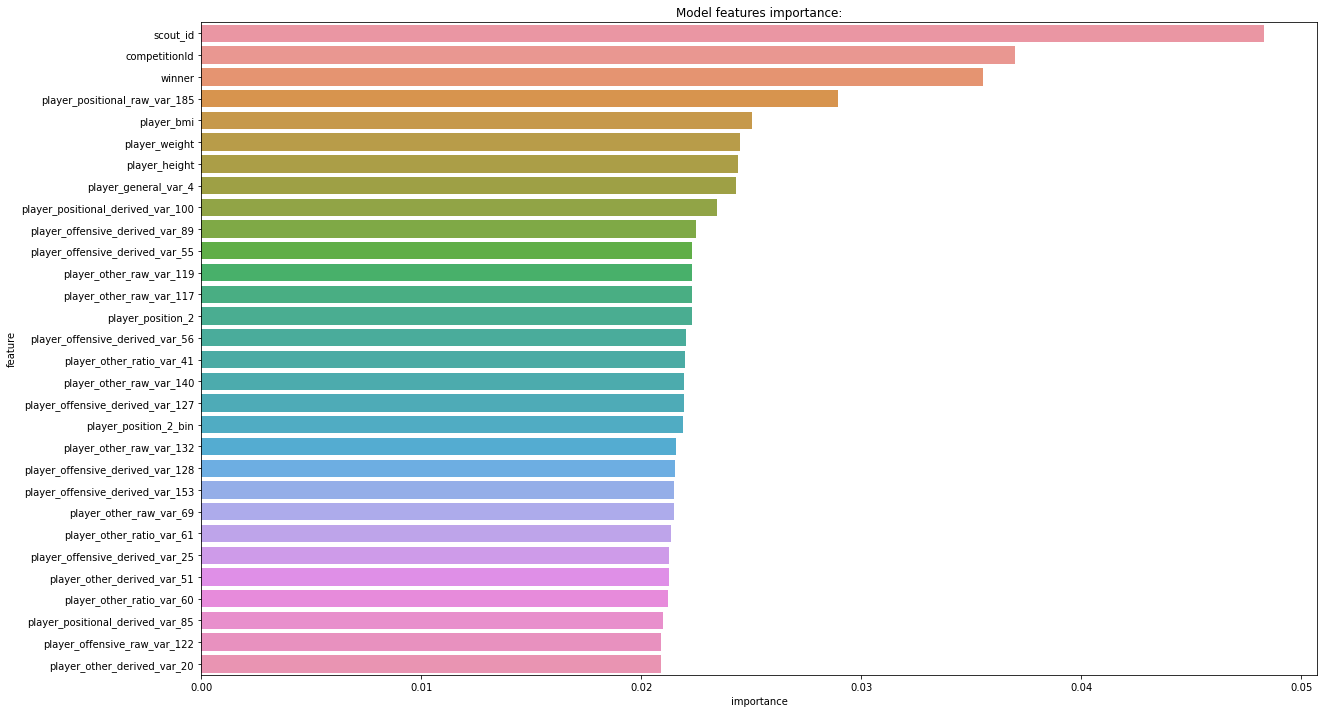

In [307]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = new_data[features].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(30))
plt.title('Model features importance:')

In [308]:
new_feat = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50)['feature'].to_list()

In [309]:
new_feat

['scout_id',
 'competitionId',
 'winner',
 'player_positional_raw_var_185',
 'player_bmi',
 'player_weight',
 'player_height',
 'player_general_var_4',
 'player_positional_derived_var_100',
 'player_offensive_derived_var_89',
 'player_offensive_derived_var_55',
 'player_other_raw_var_119',
 'player_other_raw_var_117',
 'player_position_2',
 'player_offensive_derived_var_56',
 'player_other_ratio_var_41',
 'player_other_raw_var_140',
 'player_offensive_derived_var_127',
 'player_position_2_bin',
 'player_other_raw_var_132',
 'player_offensive_derived_var_128',
 'player_offensive_derived_var_153',
 'player_other_raw_var_69',
 'player_other_ratio_var_61',
 'player_offensive_derived_var_25',
 'player_other_derived_var_51',
 'player_other_ratio_var_60',
 'player_positional_derived_var_85',
 'player_offensive_raw_var_122',
 'player_other_derived_var_20',
 'player_other_derived_var_115',
 'team1_system_id',
 'player_other_ratio_var_11',
 'player_other_raw_var_141',
 'player_other_raw_var_184'

In [310]:
X = train_df[features]
y = train_df[target]

In [311]:
y=y.astype('int')

In [312]:
X = train_df[new_feat]

In [313]:
from sklearn.model_selection import KFold

In [314]:
oof_f1=[]
oof_predictions=[]

params = {'learning_rate': 0.3,
         'subsample': 0.7845527188607021,
         'colsample_bytree': 0.6474680443294045,
         'max_depth': 8,
         'scale_pos_weight': 1}
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# fold=StratifiedKFold(n_splits=5)#15#5#10 features 

i=1
for train_index, test_index in kfold.split(X, y):
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LGBMClassifier(**params, n_estimators=1000)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    preds=model.predict(X_test)

    print(f'r2, fold {i}: {r2_score(y_test,preds)}')
    i+=1                
    oof_f1.append(r2_score(y_test,preds))
    # p2 = model.predict_proba(test_df[features])[:, -1]
    # oof_predictions.append(p2)
    
#     x_train,x_val=train[train_indices],train[val_indices]
# y_train,y_val=y[train_indices],y[val_indices]
    

print(np.mean(oof_f1))



r2, fold 1: -0.23195224118004987
r2, fold 2: -0.28624221104274716
r2, fold 3: -0.044779173432654806
r2, fold 4: -0.21039634362084558
r2, fold 5: -0.4542265362905282
-0.24551930111336512


In [321]:
inside = 100
outside =100

In [ ]:
from sklearn import svm, preprocessing
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0]}
## Define the SVM model
svc_clf = svm.SVC()
## Define svm model
svc_model = SVC() 
## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(X_train, y_train)
#keys = list(clf.cv_results_.keys())
#for key in keys[16:31]:
#    print(clf.cv_results_[key])
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)

In [ ]:
cv_estimate = ms.cross_val_score(clf, X_train, y_train, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

In [319]:
from sklearn import svm, preprocessing
from sklearn.svm import SVC
# svm_mod = svm.SVC(C = clf.best_estimator_.C,
#                   gamma = clf.best_estimator_.gamma,
#                   probability=True) 
svm_mod = svm.SVC(C=1000)
svm_mod.fit(X_train, y_train)
prediction = svm_mod.predict(X_test)
print(r2_score(prediction, y_test))

-0.7471977057403969


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
# cat_reg.fit(X_train,y_train)

In [ ]:

# pred_ = cat_reg.predict(X_test)

# cat_reg.score(X_train,y_train)
# # prediction_ = logistic_mod.predict(X_test)
# print(r2_score(pred_, y_test))

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def objective(trial):
    cat_oof_f1=[]
    cat_oof_predictions=[]


    param = {}
#     param['objective'] = "Logloss"
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
    param['depth'] = trial.suggest_int('depth', 3, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
    param['use_best_model'] = True
    param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
    param['random_state'] = 0
    ?param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 1, 10)
    param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
    param['logging_level'] = 'Silent'



    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    # fold= KFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in kfold.split(X,y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = CatBoostClassifier(**param)
#         model = XGBClassifier(**param)
    

        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#early100
        preds=model.predict(X_test)

        cat_oof_f1.append(r2_score(y_test,preds))

    return np.mean(cat_oof_f1)


In [ ]:
import optuna

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10) #10000

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
model.score(X_train,y_train)

In [ ]:
model = XGBClassifier(learning_rate = 0.1,max_depth = 8, n_estimators = 500)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(r2_score(prediction, y_test))

In [ ]:
oof_f1=[]
oof_predictions=[]

params = {'learning_rate': 0.3,
         'subsample': 0.7845527188607021,
         'colsample_bytree': 0.6474680443294045,
         'max_depth': 8,
         'scale_pos_weight': 1}
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# fold=StratifiedKFold(n_splits=5)#15#5#10 features 

i=1
for train_index, test_index in kfold.split(X, y):
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LGBMClassifier(**params, n_estimators=1000)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    preds=model.predict(X_test)

    print(f'r2, fold {i}: {r2_score(y_test,preds)}')
    i+=1                
    oof_f1.append(r2_score(y_test,preds))
    p2 = model.predict_proba(test_df[features])[:, -1]
    oof_predictions.append(p2)
    
#     x_train,x_val=train[train_indices],train[val_indices]
# y_train,y_val=y[train_indices],y[val_indices]
    

print(np.mean(oof_f1))


# fold=StratifiedKFold(n_splits=5)#15#5#10

# i=1
# for train_index, test_index in fold.split(X_,y_):
        
#     X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
#     y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]

#     model = LGBMClassifier(**params, n_estimators=1000)

#     model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
#     preds=model.predict(X_test)

#     print(f'F1, fold {i}: {f1_score(y_test,preds)}')
#     i+=1                
#     oof_f1.append(f1_score(y_test,preds))
#     p2 = model.predict_proba(test_df[features])[:, -1]
#     oof_predictions.append(p2)
    

# print(np.mean(oof_f1))

In [ ]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = new_data[features].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('Model features importance:')

## Feature Selection

In [ ]:
new_feat = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50)['feature'].to_list()

In [ ]:
new_feat

## Hyperparameter Tuning

In [ ]:
# pip install optuna

In [ ]:
import optuna

In [ ]:
X = train_df[features]
y = train_df[target]

In [ ]:
y=y.astype('int')

In [ ]:
X = train_df[new_feat]

In [ ]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
#     param['objective'] = "Logloss"
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
    param['depth'] = trial.suggest_int('depth', 3, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
    param['use_best_model'] = True
    param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
    param['random_state'] = 0
    # param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 1, 10)
    param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
    param['logging_level'] = 'Silent'



    fold=KFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in kfold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = CatBoostClassifier(**param)
#         model = XGBClassifier(**param)
    

        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#early100
        preds=model.predict(X_test)

        oof_f1.append(r2_score(y_test,preds))

    return np.mean(oof_f1)



    


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10) #10000 

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
trial.params

In [ ]:
model.score(X_train,y_train)

In [ ]:
preds=model.predict(X_test)

In [ ]:
oof_f1=[]
lgb_oof_predictions=[]


param = trial.params 
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X_,y_):
        
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
    
    model = LGBMClassifier(**param ,n_estimators=10000)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    preds=model.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    oof_f1.append(f1_score(y_test,preds))
    p2 = model.predict_proba(test_df[X_.columns])[:, -1]
    lgb_oof_predictions.append(p2)
    
print(np.mean(oof_f1))

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cat_reg = CatBoostRegressor(iterations=1000,
                          learning_rate=1,
                          depth=4)

In [ ]:
cat_reg.fit(X_train,y_train)